<a href="https://colab.research.google.com/github/rawanalharthi0/Spam-Email-Classification/blob/main/1NaiveBayesClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Rawan Alharthi 444001029**

**Mashael Abdali 444001062**

**Shaimaa Alghamdi 444000746**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import  naive_bayes, model_selection , base, metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
url = '/content/drive/MyDrive/spambase/spambase.data'
columns = [f'feature_{i}' for i in range(1, 58)] + ['label']
data = pd.read_csv(url, header=None, names=columns)

data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,label
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [4]:
# Check for missing values
df = pd.read_csv('/content/drive/MyDrive/spambase/spambase.data')

missing_values = df.isnull().sum()

if missing_values.any():
    print("\nThere are missing values in the dataset.")
else:
    print("\nThere are no missing values in the dataset.")


There are no missing values in the dataset.


In [5]:
# Split Data into Features + Target
X = data.iloc[:, :-1].values
y = data['label'].values

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [6]:
# 0 = Not Spam , 1 = Spam
labels = {0 : "Not Spam", 1 : "Spam"}
label_counts = data['label'].value_counts()
print(label_counts)

label
0    2788
1    1813
Name: count, dtype: int64


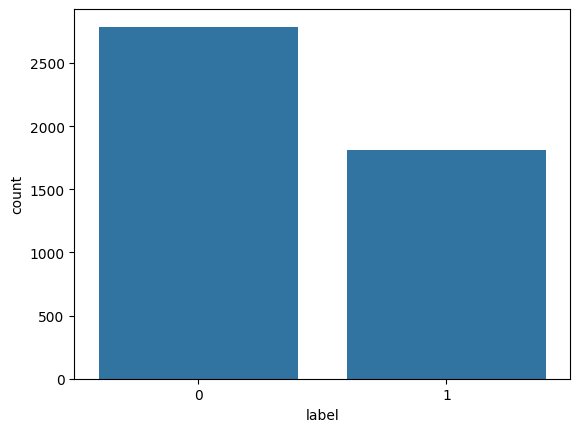

In [7]:
# Data Visualization
sns.countplot(x = 'label', data = data)
plt.show()

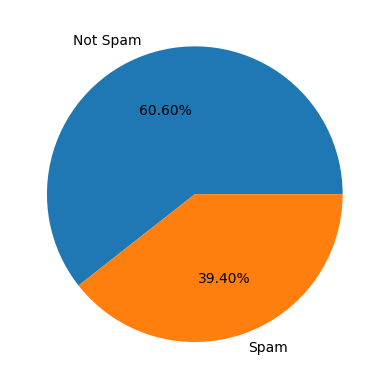

In [8]:
plt.pie(label_counts, labels = labels.values(), autopct = "%.2f%%")
plt.show()

In [9]:
# Removing Duplicate Emails
print(f"Number of duplicated  : {np.sum(data.duplicated())}")

data.drop_duplicates(inplace = True)

print(f"Number after removing duplicates : {np.sum(data.duplicated())}")
print(data.shape)

Number of duplicated  : 391
Number after removing duplicates : 0
(4210, 58)


In [10]:
# After Removing Duplicate Emails
label_counts = data['label'].value_counts()
print(label_counts)

label
0    2531
1    1679
Name: count, dtype: int64


In [11]:
X = data.drop('label', axis = 1).values
y = data['label'].values

print(X.shape, y.shape)

(4210, 57) (4210,)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(3368, 57) (842, 57)


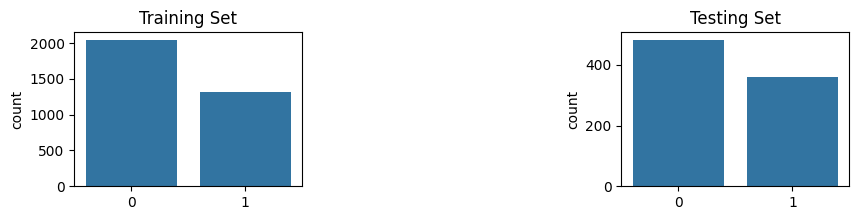

In [13]:
plt.figure(figsize = (10, 2))

plt.subplot(1, 3, 1)
plt.title("Training Set")
sns.countplot(x = y_train)

plt.subplot(1, 3, 3)
plt.title("Testing Set")
sns.countplot(x = y_test)
plt.show()

In [14]:
# Naive Bayes Model Building
classes = np.unique(y)

n_samples, n_features = X.shape
n_classes = len(classes)

# Prior Probabilities
priors = {}
for class_label in classes:
    priors[class_label] = np.mean(y == class_label)

In [15]:
means = {}
variances = {}

for class_label in classes:
    X_class = X[y == class_label]
    means[class_label] = np.mean(X_class, axis=0)
    variances[class_label] = np.var(X_class, axis=0) + 1e-9

def gaussian_likelihood(x, mean, var):
    return (1 / np.sqrt(2 * np.pi * var)) * np.exp(- (x - mean) ** 2 / (2 * var))

In [16]:
def calculate_posterior(x):
    posteriors = []
    for class_label in classes:
        prior = np.log(priors[class_label])
        likelihood = 0
        for i in range(n_features):
            likelihood += np.log(gaussian_likelihood(x[i], means[class_label][i], variances[class_label][i]))
        posterior = prior + likelihood
        posteriors.append(posterior)
    return classes[np.argmax(posteriors)]
    evaluate(model)

In [ ]:
# Predict for the test set
predictions = [calculate_posterior(x) for x in X_test]

In [18]:
# Accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy  : ", accuracy)

Accuracy  :  0.850356294536817


[[367 116]
 [ 10 349]]


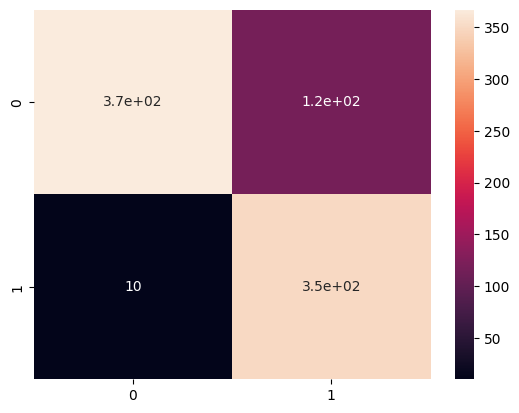

In [19]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

sns.heatmap(cm, annot = True)
plt.show()

In [20]:
clf_report = metrics.classification_report(y_test, predictions)
print(clf_report)

              precision    recall  f1-score   support

           0       0.97      0.76      0.85       483
           1       0.75      0.97      0.85       359

    accuracy                           0.85       842
   macro avg       0.86      0.87      0.85       842
weighted avg       0.88      0.85      0.85       842



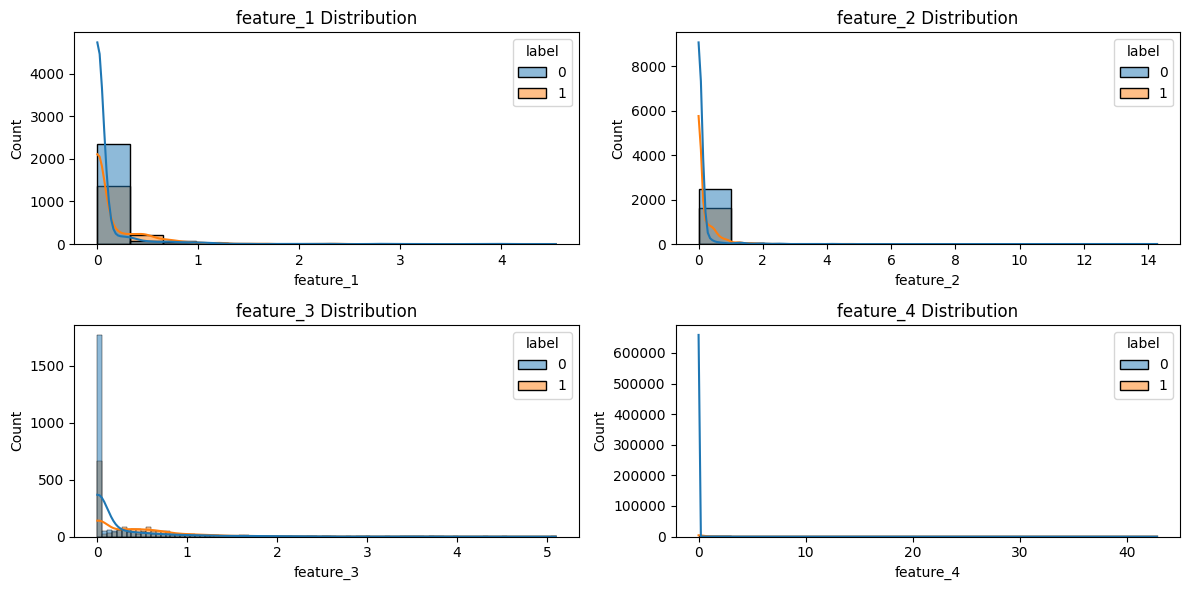

In [21]:
# Visualizing Feature Distribution Across Classes
plt.figure(figsize=(12, 6))
for i, feature in enumerate(columns[:4]):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data=data, x=feature, hue='label', kde=True)
    plt.title(f'{feature} Distribution')

plt.tight_layout()
plt.show()